In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#creating path
path = 'C:/Users/logan/Downloads/CareerFoundry/NBA Stats'

In [4]:
#connecting csv
df = pd.read_csv(os.path.join(path, '02 Data',  'Prepared Data', 'final nba stats set csv position fix.csv'))

In [5]:
df.head(20)

,player_id,season,player,team_abbreviation,state,age,player_height,player_weight,college,country,...,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,mvp,position,experience,season_result
0,419,1997,A.C. Green,DAL,Texas,33,205.74,102.058200,Oregon State,United States of America,...,-8.0,0.100,0.207,0.119,0.523,0.045,False,PF,12,No postseason
1,667,1998,A.C. Green,DAL,Texas,34,205.74,102.058200,Oregon State,United States of America,...,-7.2,0.090,0.196,0.118,0.496,0.074,False,PF,13,No postseason
2,1006,1999,A.C. Green,DAL,Texas,35,205.74,102.058200,Oregon State,United States of America,...,-5.6,0.097,0.179,0.148,0.441,0.043,False,PF,14,No postseason
3,9331,2000,A.C. Green,LAL,California,36,205.74,102.058200,Oregon State,United States of America,...,8.1,0.089,0.179,0.111,0.482,0.058,False,PF,15,Champion
4,11196,2001,A.C. Green,MIA,Florida,37,205.74,102.058200,Oregon State,United States of America,...,3.3,0.089,0.171,0.141,0.492,0.050,False,PF,16,Playoffs
5,1625,2000,A.J. Bramlett,CLE,Ohio,23,208.28,102.965384,Arizona,United States of America,...,-32.6,0.158,0.208,0.146,0.190,0.000,False,C,1,No postseason
6,1970,2001,A.J. Guyton,CHI,Illinois,23,185.42,81.646560,Indiana,United States of America,...,-12.4,0.018,0.053,0.169,0.495,0.198,False,PG,1,No postseason
7,2613,2002,A.J. Guyton,CHI,Illinois,24,185.42,81.646560,Indiana,United States of America,...,-3.8,0.022,0.067,0.221,0.477,0.248,False,PG,2,No postseason
8,2929,2003,A.J. Guyton,GSW,California,25,185.42,81.646560,Indiana,United States of America,...,-3.9,0.000,0.000,0.282,0.000,0.400,False,PG,3,No postseason
9,12588,2023,A.J. Lawson,DAL,Texas,22,198.12,81.192968,South Carolina,Canada,...,-20.1,0.046,0.152,0.189,0.589,0.032,False,SG,1,No postseason


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_id          12844 non-null  int64  
 1   season             12844 non-null  int64  
 2   player             12844 non-null  object 
 3   team_abbreviation  12844 non-null  object 
 4   state              12844 non-null  object 
 5   age                12844 non-null  int64  
 6   player_height      12844 non-null  float64
 7   player_weight      12844 non-null  float64
 8   college            10990 non-null  object 
 9   country            12844 non-null  object 
 10  draft_year         12844 non-null  object 
 11  draft_round        12844 non-null  object 
 12  draft_number       12844 non-null  object 
 13  gp                 12844 non-null  int64  
 14  pts                12844 non-null  float64
 15  reb                12844 non-null  float64
 16  ast                128

C:\Users\logan\AppData\Local\Temp\ipykernel_22704\1242924032.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['net_rating'], bins=25) # Shows extreme values
C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_

<Axes: xlabel='net_rating', ylabel='Density'>

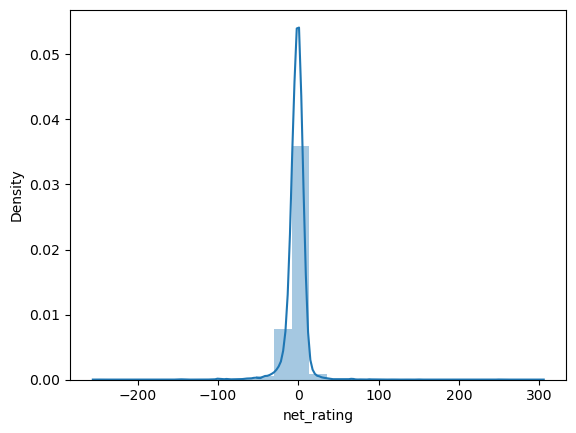

In [7]:
sns.distplot(df['net_rating'], bins=25) # Shows extreme values

In [8]:
#checking for outliers
df.describe()

,player_id,season,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,experience
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,6421.500000,2010.609467,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595,5.555279
std,3707.887763,7.879836,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172,4.083815
min,0.000000,1997.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3210.750000,2004.000000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000,2.000000
50%,6421.500000,2011.000000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000,5.000000
75%,9632.250000,2018.000000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000,8.000000
max,12843.000000,2023.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000,22.000000


In [9]:
#filtering out rows with net_rating above 30 or below -30
df = df[(df['net_rating'] <= 30) & (df['net_rating'] >= -30)]

In [10]:
#filtering out players who played less than five games
df = df[df['gp'] >= 5]

C:\Users\logan\AppData\Local\Temp\ipykernel_22704\1242924032.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['net_rating'], bins=25) # Shows extreme values
C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_

<Axes: xlabel='net_rating', ylabel='Density'>

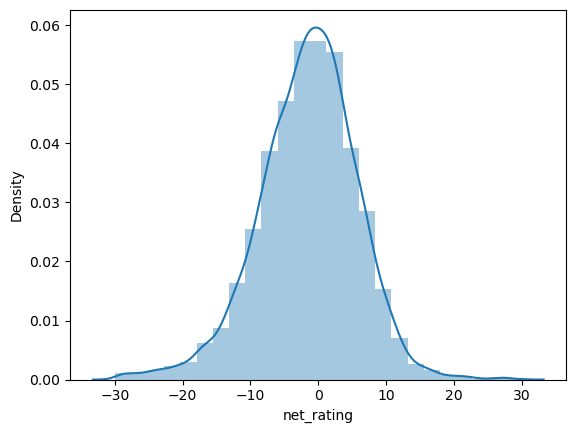

In [11]:
sns.distplot(df['net_rating'], bins=25) # Shows extreme values

In [12]:
#checking for missing values
df.isnull().sum()

player_id               0
season                  0
player                  0
team_abbreviation       0
state                   0
age                     0
player_height           0
player_weight           0
college              1781
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
mvp                     0
position                0
experience              0
season_result           0
dtype: int64

In [13]:
df.drop('college', axis=1, inplace=True)

In [14]:
df.shape

(12163, 26)

In [15]:
df['position'].value_counts()

position
SG    2535
PF    2503
C     2484
PG    2367
SF    2274
Name: count, dtype: int64

## Looking at championships by team location

In [16]:
#create subset for each season result
champions_df = df[df['season_result'] == 'Champion']

playoffs_df = df[df['season_result'] == 'Playoffs']

all_playoffs_df = df[df['season_result'].isin(['Champion', 'Playoffs'])]

no_playoffs_df = df[df['season_result'] == 'No postseason']

#group by state
championship_count_by_state = champions_df.groupby('state').size()

#reset the index
championship_count_df = championship_count_by_state.reset_index(name='championship_count')

#display the result
print(championship_count_df)

           state  championship_count
0     California                 149
1       Colorado                  16
2        Florida                  45
3       Illinois                  29
4  Massachusetts                  15
5       Michigan                  12
6           Ohio                  15
7          Texas                  86
8      Wisconsin                  17


In [17]:
#drop duplicates to ensure a state is only counted once per year for championships
unique_champions_per_year_by_state = champions_df.drop_duplicates(subset=['season', 'state'])

#group by season and state, then count
championship_count_by_year_and_state = unique_champions_per_year_by_state.groupby(['state']).size().reset_index(name='ChampionshipCount')


In [18]:
championship_count_by_year_and_state.value_counts()

state          ChampionshipCount
California     10                   1
Colorado       1                    1
Florida        3                    1
Illinois       2                    1
Massachusetts  1                    1
Michigan       1                    1
Ohio           1                    1
Texas          6                    1
Wisconsin      1                    1
Name: count, dtype: int64

# searching for correlating variables

In [19]:
#function to perform the aggregation
def calculate_avg_by_position(df_subset):
    return df_subset.groupby('position').agg({
        'pts': 'mean',
        'net_rating': 'mean',
        'usg_pct': 'mean'
    }).reset_index()

# Applying the function to each subset
avg_pts_net_rating_by_position_champions = calculate_avg_by_position(champions_df)
avg_pts_net_rating_by_position_playoffs = calculate_avg_by_position(playoffs_df)
avg_pts_net_rating_by_position_all_playoffs = calculate_avg_by_position(all_playoffs_df)
avg_pts_net_rating_by_position_no_playoffs = calculate_avg_by_position(no_playoffs_df)


In [20]:
avg_pts_net_rating_by_position_champions

,position,pts,net_rating,usg_pct
0,C,7.284146,3.606098,0.182671
1,PF,8.508000,4.668000,0.178627
2,PG,9.077027,5.514865,0.191405
3,SF,7.970270,3.817568,0.175068
4,SG,10.441772,4.244304,0.196949


In [21]:
avg_pts_net_rating_by_position_playoffs

,position,pts,net_rating,usg_pct
0,C,7.310795,1.114854,0.171391
1,PF,8.390450,0.792344,0.182938
2,PG,9.140291,1.207015,0.197367
3,SF,8.953757,0.853041,0.182606
4,SG,9.210101,0.801476,0.190821


In [22]:
avg_pts_net_rating_by_position_all_playoffs

,position,pts,net_rating,usg_pct
0,C,7.309132,1.270320,0.172095
1,PF,8.397019,1.008942,0.182697
2,PG,9.136525,1.463475,0.197012
3,SF,8.892701,1.037081,0.182138
4,SG,9.281332,1.000586,0.191176


In [23]:
avg_pts_net_rating_by_position_no_playoffs

,position,pts,net_rating,usg_pct
0,C,7.089573,-4.784872,0.171548
1,PF,8.225065,-4.689664,0.180643
2,PG,8.849199,-4.539591,0.196374
3,SF,8.822181,-4.351571,0.182470
4,SG,9.455518,-4.475449,0.194435


### here we can see a point guard with a high net rating is important in being a championship team and a good team overall

In [39]:
#calculating overall average height and weight for each subset
avg_height_weight_champions = champions_df[['player_height', 'player_weight']].mean().reset_index()
avg_height_weight_playoffs = playoffs_df[['player_height', 'player_weight']].mean().reset_index()
avg_height_weight_all_playoffs = all_playoffs_df[['player_height', 'player_weight']].mean().reset_index()
avg_height_weight_no_playoffs = no_playoffs_df[['player_height', 'player_weight']].mean().reset_index()

#displaying the results
print("Champions:", avg_height_weight_champions)
print("Playoffs:", avg_height_weight_playoffs)
print("All Playoffs:", avg_height_weight_all_playoffs)
print("No Playoffs:", avg_height_weight_no_playoffs)

Champions:            index           0
0  player_height  201.169323
1  player_weight  101.740449
Playoffs:            index           0
0  player_height  200.618795
1  player_weight  100.568352
All Playoffs:            index           0
0  player_height  200.651535
1  player_weight  100.638057
No Playoffs:            index           0
0  player_height  200.543743
1  player_weight  100.001394


## championship teams are slightly taller and heavier, but no significant difference

In [40]:
champions_df['experience'].mean()

7.458333333333333

In [41]:
playoffs_df['experience'].mean()

6.22888193643998

In [42]:
all_playoffs_df['experience'].mean()

6.301997831810438

In [43]:
no_playoffs_df['experience'].mean()

4.938836312653347

In [44]:
df['experience'].mean()

5.6625010277069805

### championships teams tend to be older

In [46]:
champions_df['net_rating'].mean()

4.353385416666667

In [47]:
playoffs_df['net_rating'].mean()

0.9506998188704101

In [48]:
all_playoffs_df['net_rating'].mean()

1.1530586959888494

In [49]:
no_playoffs_df['net_rating'].mean()

-4.571626358219418

### championship teams tend to have a significantly higher net rating on average

# Checking for Championship characteristics

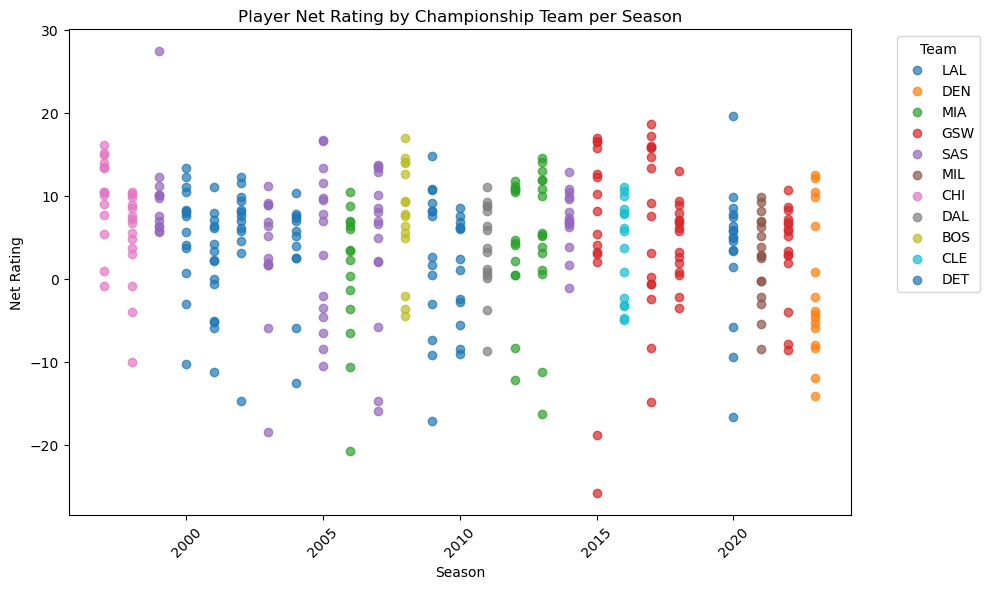

In [50]:
import matplotlib.pyplot as plt

# Filter to include only champions
champions_df = df[df['season_result'] == 'Champion']

# Plotting
plt.figure(figsize=(10, 6))  # Adjust size as needed

# Iterate through each unique team in the champions_df
for team in champions_df['team_abbreviation'].unique():
    # Filter the DataFrame for each team
    team_df = champions_df[champions_df['team_abbreviation'] == team]
    plt.scatter(team_df['season'], team_df['net_rating'], label=team, alpha=0.7)

plt.title('Player Net Rating by Championship Team per Season')
plt.xlabel('Season')
plt.ylabel('Net Rating')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position as needed
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


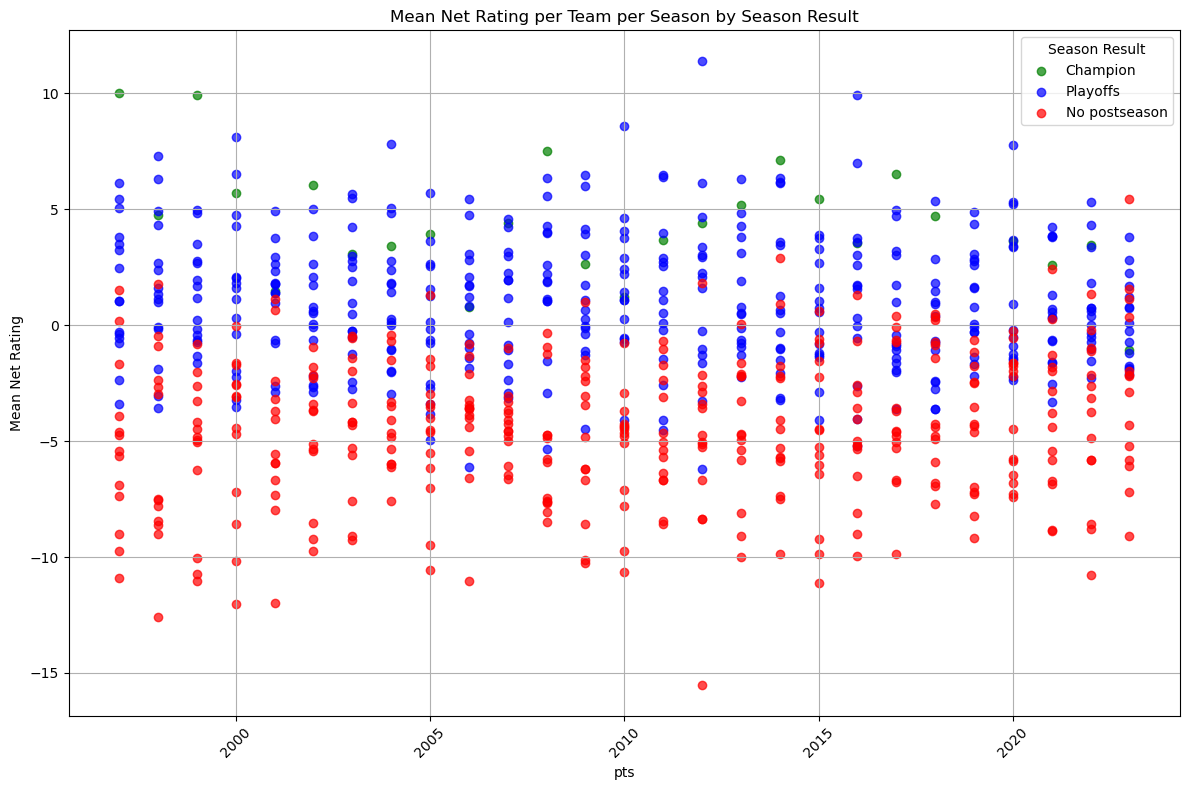

In [60]:
# Group by season, team, and season result to calculate mean net rating
team_avg_net_rating = df.groupby(['season', 'team_abbreviation', 'season_result'])['net_rating'].mean().reset_index()

#preparing the plot
plt.figure(figsize=(12, 8))

#plot each category with a different color
colors = {'Champion': 'green', 'Playoffs': 'blue', 'No postseason': 'red'}

#for each season result type, plot the mean net rating per team per season
for season_result, color in colors.items():
    subset = team_avg_net_rating[team_avg_net_rating['season_result'] == season_result]
    plt.scatter(subset['season'], subset['net_rating'], color=color, alpha=0.7, label=season_result)

plt.title('Mean Net Rating per Team per Season by Season Result')
plt.xlabel('pts')
plt.ylabel('Mean Net Rating')
plt.legend(title='Season Result')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [52]:

#calculate mean net rating for each team per season
team_season_net_rating = df.groupby(['season', 'team_abbreviation'])['net_rating'].mean().reset_index()

#rank teams within each season by net rating
team_season_net_rating['rank_in_season'] = team_season_net_rating.groupby('season')['net_rating'].rank(ascending=False)

#filter out only the rows where 'season_result' is 'Champion' from the original DataFrame to get champions
champions = df[df['season_result'] == 'Champion'].drop_duplicates(subset=['season', 'team_abbreviation'])

#merge the champions DataFrame with the ranked teams to find out the rank of the champion in each season
champion_ranks = pd.merge(champions[['season', 'team_abbreviation']], team_season_net_rating, on=['season', 'team_abbreviation'])

#sort the results for better readability
champion_ranks = champion_ranks.sort_values(by=['season', 'rank_in_season'])

#displaying the final DataFrame
print(champion_ranks[['season', 'team_abbreviation', 'rank_in_season']])

    season team_abbreviation  rank_in_season
15    1997               CHI             1.0
16    1998               CHI             4.0
10    1999               SAS             1.0
0     2000               LAL             3.0
19    2001               LAL             9.0
20    2002               LAL             1.0
21    2003               SAS             4.0
23    2004               DET             3.0
13    2005               SAS             2.0
5     2006               MIA            10.0
14    2007               SAS             2.0
18    2008               BOS             1.0
2     2009               LAL             6.0
3     2010               LAL             9.0
17    2011               DAL             4.0
25    2012               MIA             4.0
24    2013               MIA             2.0
11    2014               SAS             1.0
7     2015               GSW             1.0
22    2016               CLE             5.0
6     2017               GSW             1.0
8     2018

### despite a few outliers, the champion is almost always in the top 5 for average net rating. That also may be due to how the data is set up

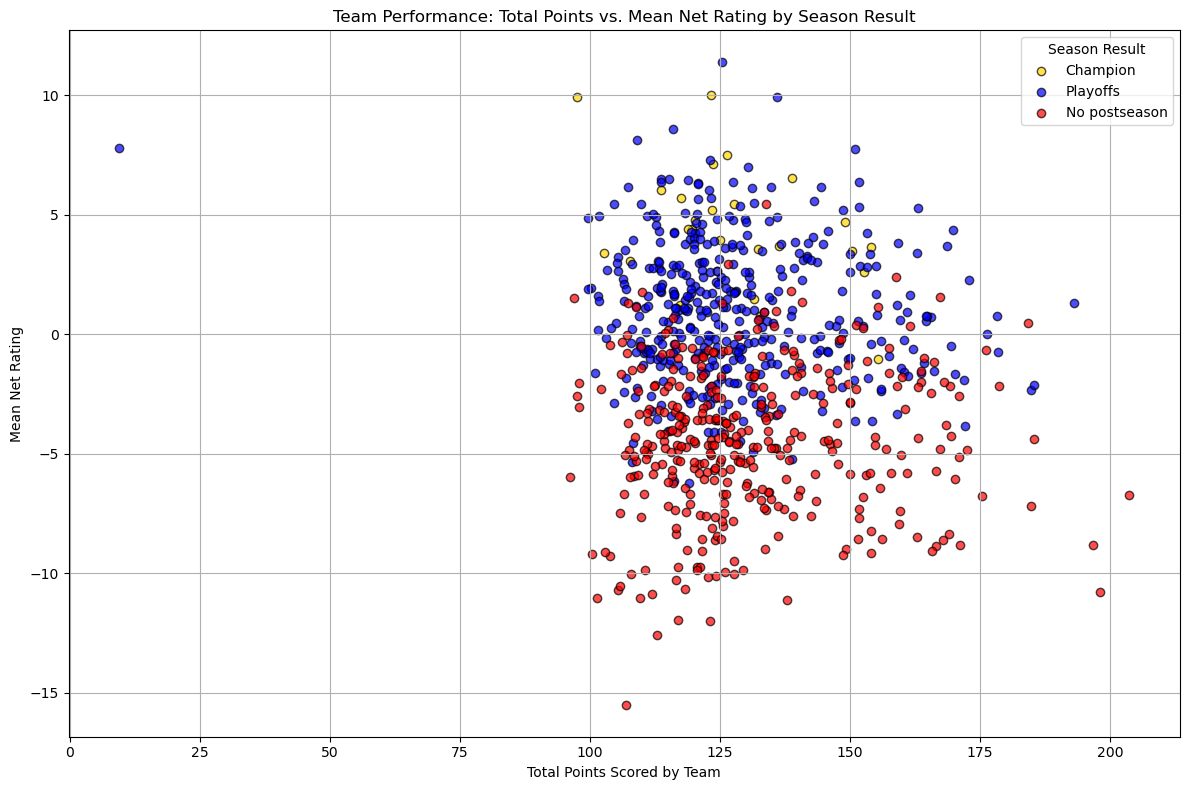

In [61]:
team_performance = df.groupby(['season', 'team_abbreviation', 'season_result']).agg({
    'pts': 'sum',
    'net_rating': 'mean'
}).reset_index()

# Preparing the plot
plt.figure(figsize=(12, 8))

# Colors for each season result
colors = {'Champion': 'gold', 'Playoffs': 'blue', 'No postseason': 'red'}

# Plotting each category
for season_result, color in colors.items():
    subset = team_performance[team_performance['season_result'] == season_result]
    plt.scatter(subset['pts'], subset['net_rating'], color=color, alpha=0.7, label=season_result, edgecolors='k')

plt.title('Team Performance: Total Points vs. Mean Net Rating by Season Result')
plt.xlabel('Total Points Scored by Team')
plt.ylabel('Mean Net Rating')
plt.legend(title='Season Result')
plt.grid(True)
plt.tight_layout()
plt.show()

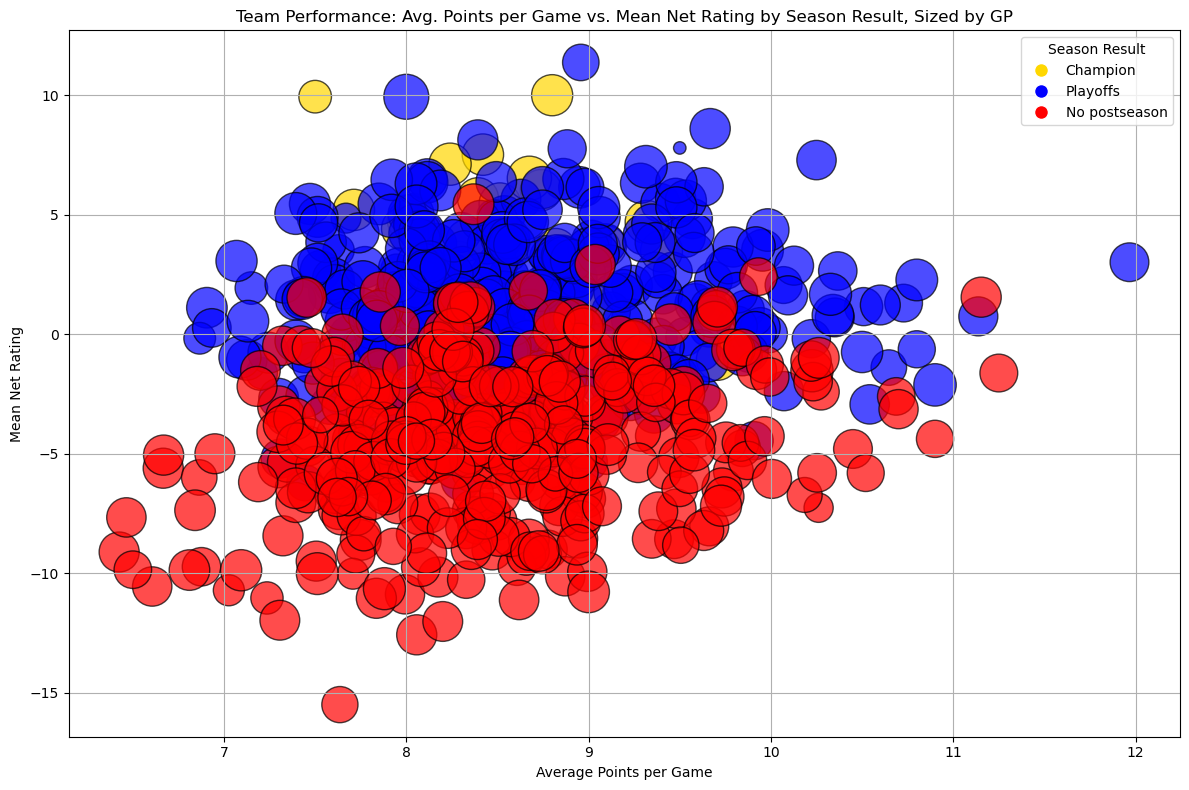

In [63]:
# Group by season, team, and season result to calculate mean net rating and average points
# And sum up the games played for size representation
team_performance = df.groupby(['season', 'team_abbreviation', 'season_result']).agg({
    'pts': 'mean',  # Since pts is already average points per game
    'gp': 'sum',  # Total games played
    'net_rating': 'mean'  # Mean net rating
}).reset_index()

# Preparing the plot
plt.figure(figsize=(12, 8))

# Colors for each season result
colors = {'Champion': 'gold', 'Playoffs': 'blue', 'No postseason': 'red'}

# Plotting each category with GP influencing the size of the dot
for season_result, color in colors.items():
    subset = team_performance[team_performance['season_result'] == season_result]
    plt.scatter(subset['pts'], subset['net_rating'], s=subset['gp'], color=color, alpha=0.7, label=season_result, edgecolors='k')

# Adjusting the legend to not include sizes
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10, label=sr) for sr, c in colors.items()]
plt.legend(handles=legend_elements, title='Season Result')

plt.title('Team Performance: Avg. Points per Game vs. Mean Net Rating by Season Result, Sized by GP')
plt.xlabel('Average Points per Game')
plt.ylabel('Mean Net Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


In [64]:
# Calculate a factor based on games played. This could be as simple as the raw GP value, 
# or something more nuanced like a logarithm to prevent the GP from having an outsized impact.
df['gp_factor'] = df['gp'] / df['gp'].max()  # Normalize by the maximum GP in the dataset

# Calculate the Performance Index by multiplying net rating by the gp_factor
df['performance_index'] = df['net_rating'] * df['gp_factor']


In [65]:
# Adjust the aggregation to use the new Performance Index
team_performance_adjusted = df.groupby(['season', 'team_abbreviation', 'season_result']).agg({
    'pts': 'mean',  # Average points per game remains unchanged
    'gp': 'sum',  # Sum of games played for informational purposes
    'performance_index': 'mean'  # Use the mean of the new Performance Index
}).reset_index()


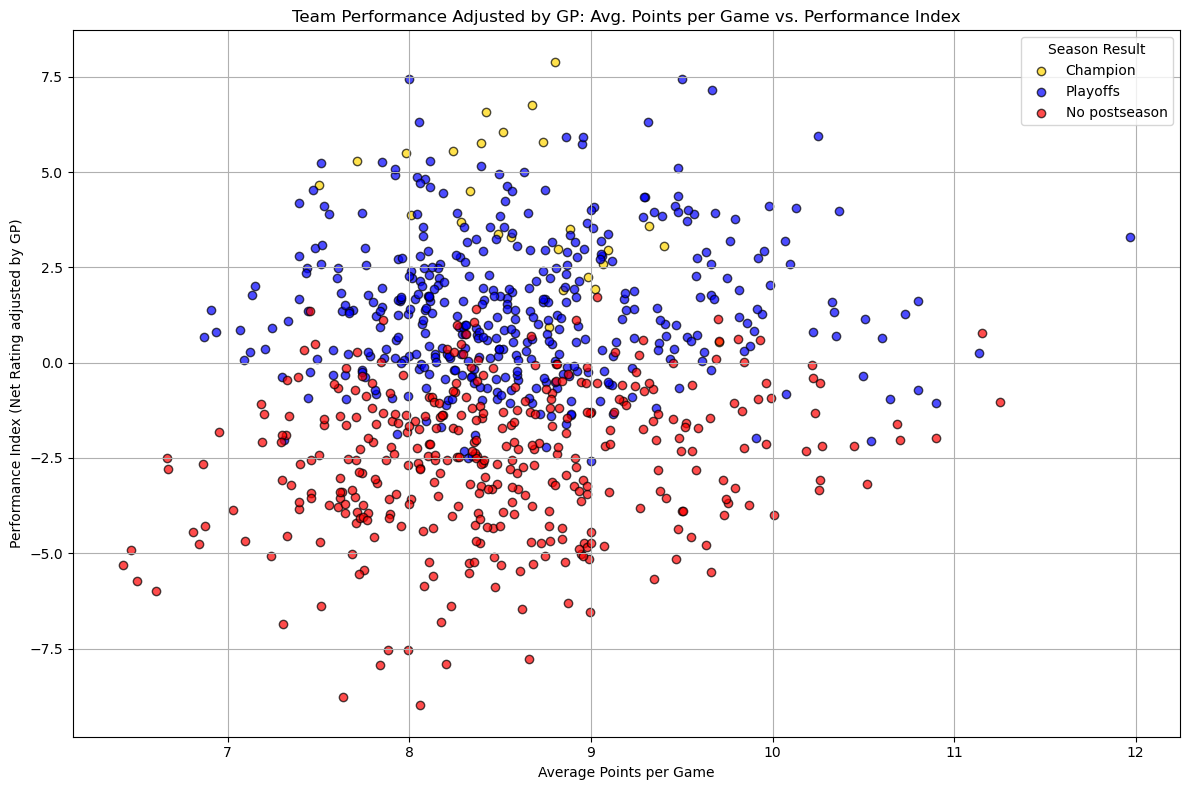

In [66]:
# Plotting with the adjusted Performance Index
plt.figure(figsize=(12, 8))

# Use the same color coding
colors = {'Champion': 'gold', 'Playoffs': 'blue', 'No postseason': 'red'}

# Plot using the new Performance Index
for season_result, color in colors.items():
    subset = team_performance_adjusted[team_performance_adjusted['season_result'] == season_result]
    plt.scatter(subset['pts'], subset['performance_index'], color=color, alpha=0.7, label=season_result, edgecolors='k')

plt.title('Team Performance Adjusted by GP: Avg. Points per Game vs. Performance Index')
plt.xlabel('Average Points per Game')
plt.ylabel('Performance Index (Net Rating adjusted by GP)')
plt.legend(title='Season Result')
plt.grid(True)
plt.tight_layout()
plt.show()


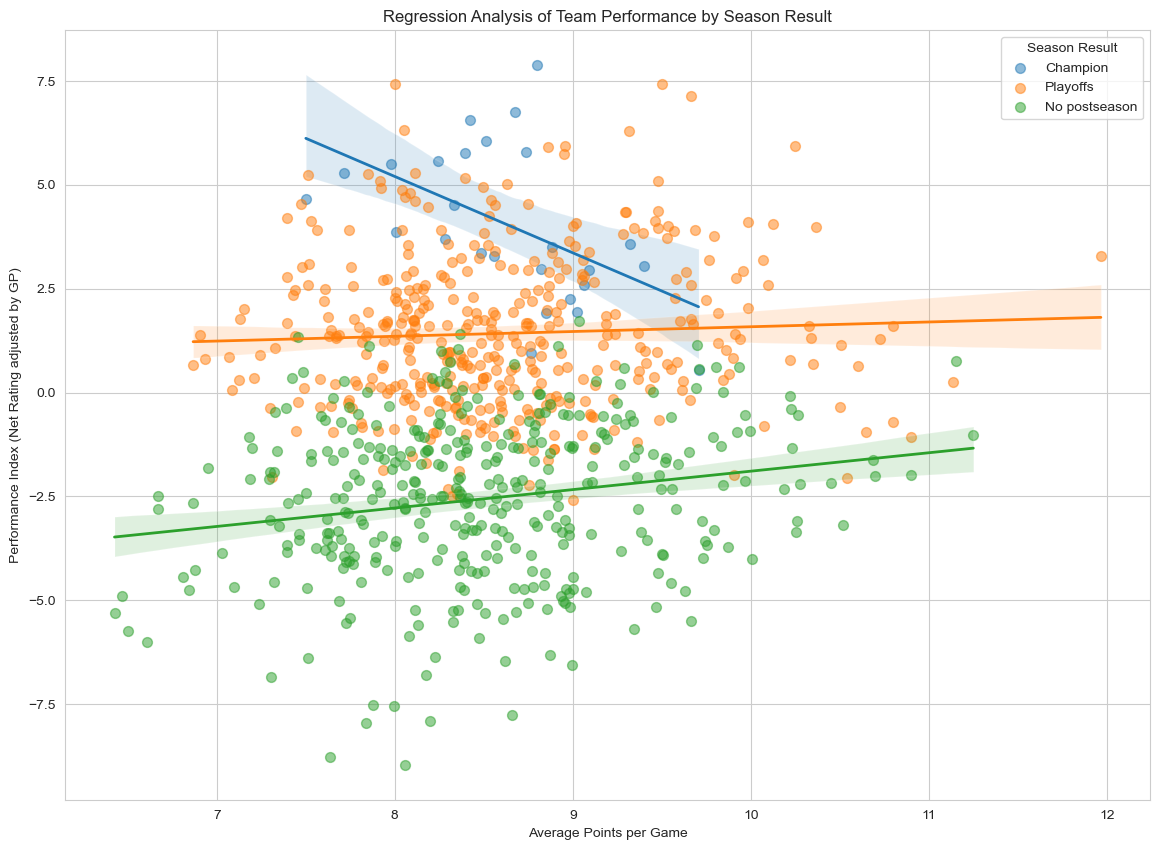

In [67]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

plt.figure(figsize=(14, 10))

# Map each season result to a different plot with a regression line
for category in ['Champion', 'Playoffs', 'No postseason']:
    subset = team_performance_adjusted[team_performance_adjusted['season_result'] == category]
    sns.regplot(x='pts', y='performance_index', data=subset, label=category, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'linewidth': 2})

plt.title('Regression Analysis of Team Performance by Season Result')
plt.xlabel('Average Points per Game')
plt.ylabel('Performance Index (Net Rating adjusted by GP)')
plt.legend(title='Season Result')
plt.show()

C:\Users\logan\AppData\Local\Temp\ipykernel_22704\2432885989.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='season', y='performance_index', data=subset, estimator='mean', label=category, ci=None)
C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd

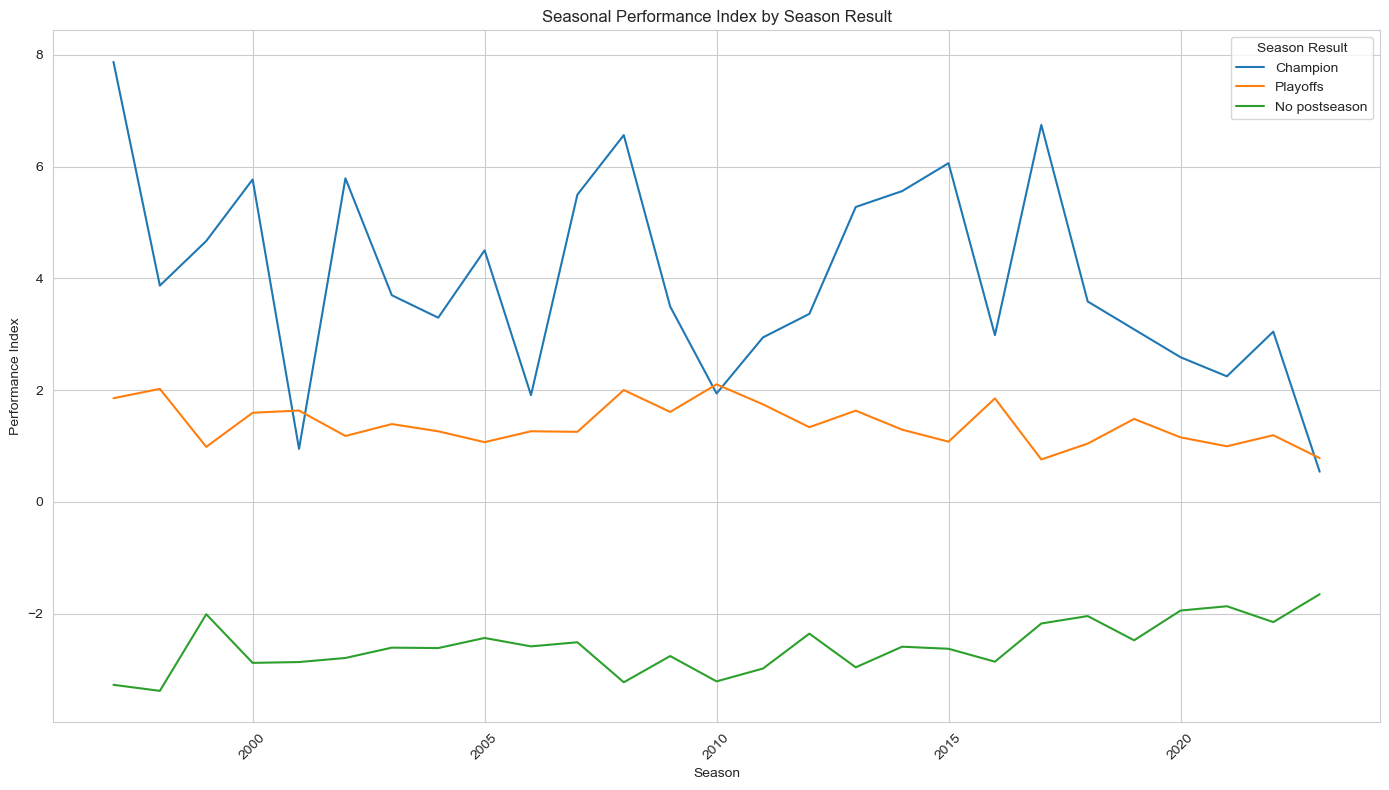

In [68]:

# Plotting
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Define your categories
season_results = ['Champion', 'Playoffs', 'No postseason']

# Plot with a line for each season_result category
for category in season_results:
    subset = df[df['season_result'] == category]
    # Assuming 'performance_index' is already calculated and reflects the team's performance
    sns.lineplot(x='season', y='performance_index', data=subset, estimator='mean', label=category, ci=None)

plt.title('Seasonal Performance Index by Season Result')
plt.xlabel('Season')
plt.ylabel('Performance Index')
plt.legend(title='Season Result')
plt.xticks(rotation=45)  # Helps with readability if many seasons are plotted
plt.tight_layout()
plt.show()

### Interesting to see the drop among championship teams in terms of overall performance while non-playoff teams are getting better. Perhaps this is a sign of better parity in the league.

# Hypotheis: Points are not always indicative of a player's impact. (Defense wins championships)

In [69]:
correlation = df[['pts', 'net_rating']].corr()

print(correlation)

                 pts  net_rating
pts         1.000000    0.272959
net_rating  0.272959    1.000000


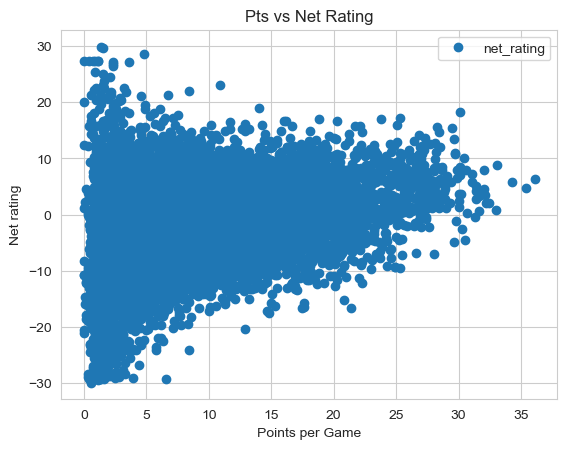

In [71]:
df.plot(x = 'pts', y='net_rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Pts vs Net Rating')  
plt.xlabel('Points per Game')  
plt.ylabel('Net rating')  
plt.show()

In [72]:
X = df['pts'].values.reshape(-1,1)
y = df['net_rating'].values.reshape(-1,1)

In [73]:
X

array([[ 7.2],
       [ 7.3],
       [ 4.9],
       ...,
       [17.2],
       [15.3],
       [16.9]])

In [74]:
y

array([[-8. ],
       [-7.2],
       [-5.6],
       ...,
       [-7.9],
       [-3.7],
       [ 2.5]])

In [75]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [76]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [77]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [78]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

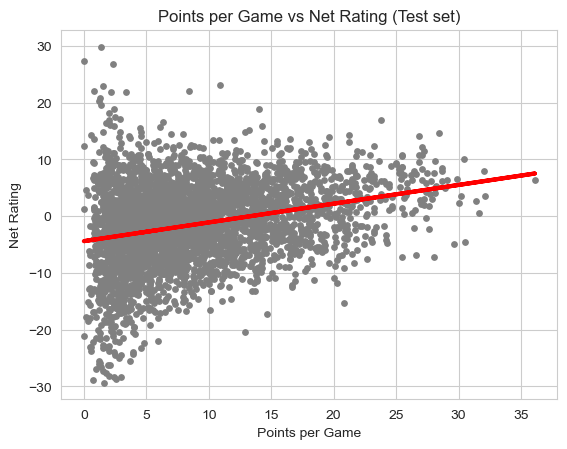

In [79]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Points per Game vs Net Rating (Test set)')
plot_test.xlabel('Points per Game')
plot_test.ylabel('Net Rating')
plot_test.show()

In [80]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [81]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.33015307]]
Mean squared error:  47.01489287715409
R2 score:  0.08092847876981346


In [82]:
y_predicted

array([[-2.97417213],
       [-2.28085068],
       [-2.80909559],
       ...,
       [-4.09669256],
       [-2.11577415],
       [-2.44592722]])

In [83]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,-5.8,-2.974172
1,3.5,-2.280851
2,-8.9,-2.809096
3,-7.3,-1.257376
4,7.0,0.459420
5,-4.5,1.945109
6,-7.5,-3.634478
7,-3.6,-1.950698
8,-4.3,-2.809096
9,-12.2,-1.752606


### These predictions are very far off. Scoring lots of points is not an indicator of how positive your impact is!

In [84]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [85]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [86]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.33015307]]
Mean squared error:  49.729146651546536
R2 score:  0.0715882905458578


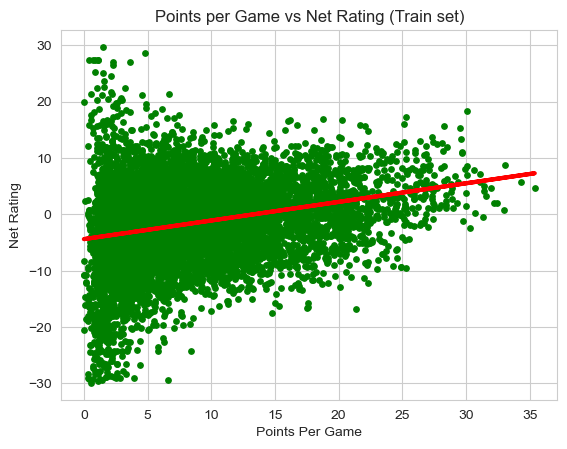

In [88]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Points per Game vs Net Rating (Train set)')
plot_test.xlabel('Points Per Game')
plot_test.ylabel('Net Rating')
plot_test.show()

# let's try a slightly tighter dataset

In [89]:
#filtering out rows with net_rating above 20 or below -20
filtered_df = df[(df['net_rating'] <= 20) & (df['net_rating'] >= -20)]

In [91]:
filtered_df.shape

(11938, 28)

In [92]:
correlation = filtered_df[['pts', 'net_rating']].corr()

print(correlation)

                 pts  net_rating
pts         1.000000    0.262348
net_rating  0.262348    1.000000


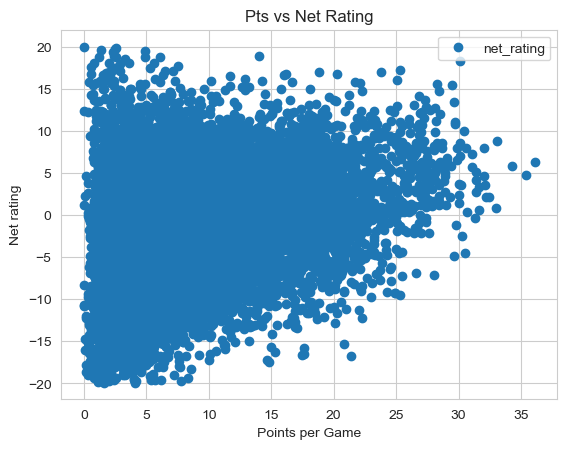

In [93]:
filtered_df.plot(x = 'pts', y='net_rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Pts vs Net Rating')  
plt.xlabel('Points per Game')  
plt.ylabel('Net rating')  
plt.show()

In [94]:
X = filtered_df['pts'].values.reshape(-1,1)
y = filtered_df['net_rating'].values.reshape(-1,1)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [97]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [98]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

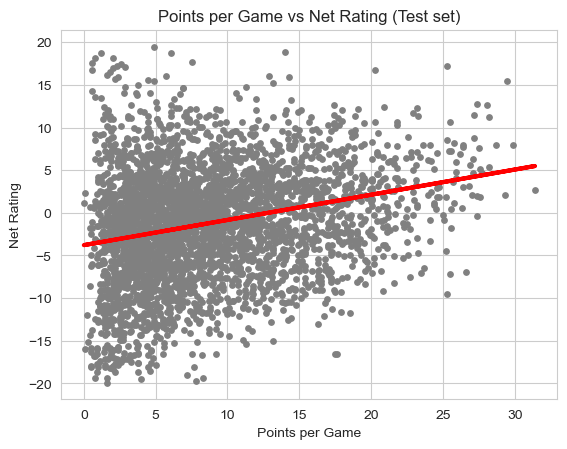

In [99]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Points per Game vs Net Rating (Test set)')
plot_test.xlabel('Points per Game')
plot_test.ylabel('Net Rating')
plot_test.show()

In [103]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [104]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.29535911]]
Mean squared error:  40.22486968469995
R2 score:  0.0590231115621509


In [105]:
y_predicted

array([[-2.13622937],
       [-1.33875977],
       [-3.43580945],
       ...,
       [-3.05184261],
       [ 0.28571534],
       [-1.33875977]])

In [106]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.4,-2.136229
1,0.8,-1.338760
2,-11.2,-3.435809
3,4.4,-2.992771
4,-2.6,-2.165765
5,-17.6,-2.667876
6,9.2,-0.275467
7,-3.6,-2.254373
8,7.0,-2.402053
9,-10.3,-1.870406


In [107]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [108]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [109]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.29535911]]
Mean squared error:  40.810513939804665
R2 score:  0.07271814264417042


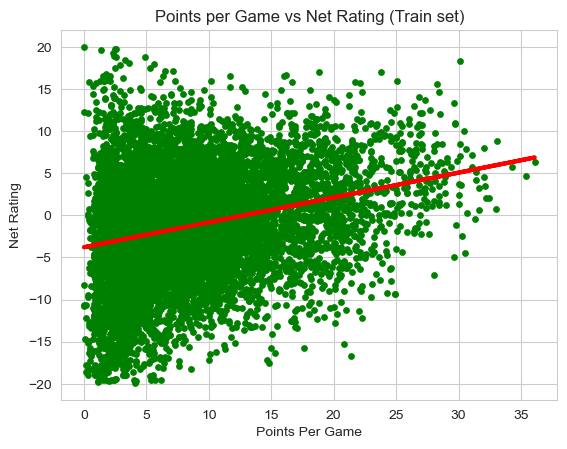

In [110]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Points per Game vs Net Rating (Train set)')
plot_test.xlabel('Points Per Game')
plot_test.ylabel('Net Rating')
plot_test.show()

## The smaller subset did not have much of an impact.